In [ ]:
'''

ENGLISH PREMIER LEAGUE CHAMPION PREDICTION PROJECT

TECHNIQUE 2: Machine Learning ( Deep Learning ) Approach


Dataset:
Premier League Matches 1992-2022
https://www.kaggle.com/datasets/evangower/premier-league-matches-19922022/data?select=premier-league-matches.csv
'''

'\n\nENGLISH PREMIER LEAGUE CHAMPION PREDICTION PROJECT\n\nTECHNIQUE 1: IA/ML APPROACH\n\n\nDataset:\nPremier League Matches 1992-2022\nhttps://www.kaggle.com/datasets/evangower/premier-league-matches-19922022/data?select=premier-league-matches.csv\n'

# **LOAD & PREPROCESS DATASET**

---




**Load Modules**

In [ ]:
# data
import numpy as np
import pandas as pd

# machine learning
import tensorflow as tf
# Assign Keras Components
Sequential = tf.keras.models.Sequential
Dense = tf.keras.layers.Dense
Adam = tf.keras.optimizers.Adam

from sklearn.preprocessing import LabelEncoder, StandardScaler

# data visualization
import matplotlib.pyplot as plt

# Evaluate Performance
from sklearn.metrics import mean_absolute_error

# Encoding
from sklearn.preprocessing import LabelEncoder

# Split Data for Training
from sklearn.model_selection import train_test_split

**Correctly choosing the Datasets folder and file**

Ensures folder is correct and found correctly with the "../datasets" etc


In [ ]:
import os

original_path = "/content/Datasets"
target_path = "/content/../Datasets"
download_url = "https://raw.githubusercontent.com/KraeBM/PremierPredictionTool/refs/heads/master/Datasets/premier-league-matches.csv"
csv_filename = "premier-league-matches.csv"

#first if the final target exists, it skips everything
if not os.path.exists(target_path):
  # fixes issue regarding folder not being present in content folder
# - would lead to errors since dataset folder never existed.
   if not os.path.exists(original_path):
    os.makedirs(original_path)
    print(f"'Datasets' folder created at {original_path}")

# This downloads the CSV file into the original_path folder if it doesn’t exist
csv_path = os.path.join(original_path, csv_filename)
if not os.path.exists(csv_path):
    os.system(f"wget -O {csv_path} {download_url}")
    print(f"Downloaded '{csv_filename}' into '{original_path}'")
else:
    print(f"'{csv_filename}' already exists in '{original_path}'")

# Check if the original path exists before renaming - also moves it out of the content folder , for preventing later issues in pycharm
if os.path.exists(original_path):
    os.rename(original_path, target_path)
elif os.path.exists(target_path):
    print("Datasets folder is already in the correct location.")

'Datasets' folder created at /content/Datasets
Downloaded 'premier-league-matches.csv' into '/content/Datasets'


**Load Dataset**

In [ ]:
premier_league_matches_dataset = pd.read_csv('../Datasets/premier-league-matches.csv')

**Read Dataset**

Reads and displays  whats containined within dataset

In [ ]:
print("Read Dataset Completed Successfully")
 #Verifies if data has been loaded correctly and displays structure of dataset
premier_league_matches_dataset.head(10)

Read Dataset Completed Successfully


,Season_End_Year,Wk,Date,Home,HomeGoals,AwayGoals,Away,FTR
0,1993,1,1992-08-15,Coventry City,2,1,Middlesbrough,H
1,1993,1,1992-08-15,Leeds United,2,1,Wimbledon,H
2,1993,1,1992-08-15,Sheffield Utd,2,1,Manchester Utd,H
3,1993,1,1992-08-15,Crystal Palace,3,3,Blackburn,D
4,1993,1,1992-08-15,Arsenal,2,4,Norwich City,A
5,1993,1,1992-08-15,Ipswich Town,1,1,Aston Villa,D
6,1993,1,1992-08-15,Everton,1,1,Sheffield Weds,D
7,1993,1,1992-08-15,Southampton,0,0,Tottenham,D
8,1993,1,1992-08-15,Chelsea,1,1,Oldham Athletic,D
9,1993,1,1992-08-16,Nott'ham Forest,1,0,Liverpool,H


# **GENERATE LEAGUE STANDINGS**

In [ ]:
# Create an empty list to store league tables
league_standings = []

# Process standings for each season
for season in premier_league_matches_dataset['Season_End_Year'].unique():
    # Filter matches for this season and stores it
    season_matches = premier_league_matches_dataset[premier_league_matches_dataset['Season_End_Year'] == season]

    # Initialize a dictionary to track team preformance stats
    team_stats = {}

    for _, match in season_matches.iterrows():
        home_team = match['Home']
        away_team = match['Away']
        home_goals = match['HomeGoals']
        away_goals = match['AwayGoals']
        result = match['FTR']   # 'H' = Home win,'A' = Away win,'D' = Draw

        # Ensure teams exist in dictionary
        if home_team not in team_stats:
            team_stats[home_team] = {'Pld': 0, 'W': 0, 'D': 0, 'L': 0, 'GF': 0, 'GA': 0, 'GD': 0, 'Pts': 0}
        if away_team not in team_stats:
            team_stats[away_team] = {'Pld': 0, 'W': 0, 'D': 0, 'L': 0, 'GF': 0, 'GA': 0, 'GD': 0, 'Pts': 0}

        # Update stats for home team
        team_stats[home_team]['Pld'] += 1
        team_stats[home_team]['GF'] += home_goals
        team_stats[home_team]['GA'] += away_goals
        team_stats[home_team]['GD'] = team_stats[home_team]['GF'] - team_stats[home_team]['GA']

        # Update stats for away team
        team_stats[away_team]['Pld'] += 1
        team_stats[away_team]['GF'] += away_goals
        team_stats[away_team]['GA'] += home_goals
        team_stats[away_team]['GD'] = team_stats[away_team]['GF'] - team_stats[away_team]['GA']

        # Assign points based on result
        if result == 'H':  # Home win
            team_stats[home_team]['W'] += 1
            team_stats[home_team]['Pts'] += 3
            team_stats[away_team]['L'] += 1
        elif result == 'A':  # Away win
            team_stats[away_team]['W'] += 1
            team_stats[away_team]['Pts'] += 3
            team_stats[home_team]['L'] += 1
        else:  # Draw
            team_stats[home_team]['D'] += 1
            team_stats[away_team]['D'] += 1
            team_stats[home_team]['Pts'] += 1
            team_stats[away_team]['Pts'] += 1

    # Converts dictionary to DataFrame
    standings_df = pd.DataFrame.from_dict(team_stats, orient='index')
    standings_df.insert(0, 'Team', standings_df.index)
    standings_df.insert(1, 'Season', season)

    # Sort by Points -> GD -> GF
    standings_df = standings_df.sort_values(by=['Pts', 'GD', 'GF'], ascending=[False, False, False]).reset_index(drop=True)

    # Assign position (Rank)
    standings_df.insert(0, 'Pos', standings_df.index + 1)

    # **Filter to only keep the top 10 teams per season**
    standings_df = standings_df.head(10)

    # Append standings for this season
    league_standings.append(standings_df)

# Combine all seasons into one DataFrame
final_league_standings = pd.concat(league_standings, ignore_index=True)

# Define the path where you want to save the file in Google Drive
save_path = "../Datasets/Premier_League_Standings.csv"

# Save the DataFrame to Google Drive - found in Datasets folder !
final_league_standings.to_csv(save_path, index=False)

print(f"File saved successfully at: {save_path}")

# KEY
print('\nKEY:\nPos: League Ranking\nPld: Played\nW: Won\nD: Drawn\nL: Lost\nGF: Goals For\nGA: Goals Against\nGD: Goal Difference\nPts: Points\n')

# Display the final league standings - shows it works :D
final_league_standings.head(200)  # Display first 5 rows

File saved successfully at: ../Datasets/Premier_League_Standings.csv

KEY:
Pos: League Ranking
Pld: Played
W: Won
D: Drawn
L: Lost
GF: Goals For
GA: Goals Against
GD: Goal Difference
Pts: Points



,Pos,Team,Season,Pld,W,D,L,GF,GA,GD,Pts
0,1,Manchester Utd,1993,42,24,12,6,67,31,36,84
1,2,Aston Villa,1993,42,21,11,10,57,40,17,74
2,3,Norwich City,1993,42,21,9,12,61,65,-4,72
3,4,Blackburn,1993,42,20,11,11,68,46,22,71
4,5,QPR,1993,42,17,12,13,63,55,8,63
...,...,...,...,...,...,...,...,...,...,...,...
195,6,Chelsea,2012,38,18,10,10,65,46,19,64
196,7,Everton,2012,38,15,11,12,50,40,10,56
197,8,Liverpool,2012,38,14,10,14,47,40,7,52
198,9,Fulham,2012,38,14,10,14,48,51,-3,52


# **DATASET EXPLORATION**

**Drop Unnecessary Columns**

In [ ]:
'''
Dropped WK & Date Columns b/c:
model is predicting winner at end of season and these 2 columns have no role in the prediction
'''

training_df = premier_league_matches_dataset[['Season_End_Year','Home','HomeGoals','AwayGoals','Away','FTR']]

**Read Updated Dataset**

In [ ]:
print("Read Dataset Completed Successfully\n")
training_df.head()

Read Dataset Completed Successfully



,Season_End_Year,Home,HomeGoals,AwayGoals,Away,FTR
0,1993,Coventry City,2,1,Middlesbrough,H
1,1993,Leeds United,2,1,Wimbledon,H
2,1993,Sheffield Utd,2,1,Manchester Utd,H
3,1993,Crystal Palace,3,3,Blackburn,D
4,1993,Arsenal,2,4,Norwich City,A


**View Dataset Statistics**

In [ ]:
# Check for missing values in dataset
print('Dataset Missing Values\n')
print(training_df.isna().sum())

Dataset Missing Values

Season_End_Year    0
Home               0
HomeGoals          0
AwayGoals          0
Away               0
FTR                0
dtype: int64


In [ ]:
# Dataset Info
print('Dataset Info\n')
print(training_df.info())

Dataset Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12026 entries, 0 to 12025
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Season_End_Year  12026 non-null  int64 
 1   Home             12026 non-null  object
 2   HomeGoals        12026 non-null  int64 
 3   AwayGoals        12026 non-null  int64 
 4   Away             12026 non-null  object
 5   FTR              12026 non-null  object
dtypes: int64(3), object(3)
memory usage: 563.8+ KB
None


In [ ]:
# Dataset Statistics
training_df.describe(include='all')

,Season_End_Year,Home,HomeGoals,AwayGoals,Away,FTR
count,12026.000000,12026,12026.000000,12026.000000,12026,12026
unique,NaN,50,NaN,NaN,50,3
top,NaN,Everton,NaN,NaN,Tottenham,H
freq,NaN,595,NaN,NaN,595,5519
mean,2007.713620,NaN,1.524364,1.142525,NaN,NaN
std,9.072559,NaN,1.306417,1.133930,NaN,NaN
min,1993.000000,NaN,0.000000,0.000000,NaN,NaN
25%,2000.000000,NaN,1.000000,0.000000,NaN,NaN
50%,2008.000000,NaN,1.000000,1.000000,NaN,NaN
75%,2016.000000,NaN,2.000000,2.000000,NaN,NaN


**Handle Categorical Variables**

In [ ]:
# Encode FTR (Full-Time Result)
label_encoder = LabelEncoder()
training_df['FTR'] = label_encoder.fit_transform(training_df['FTR'])  # H=2 (home wins), D=1 (draw/tie), A=0 (away wins)

# One-Hot Encode Home and Away teams
training_df = pd.get_dummies(training_df, columns=['Home', 'Away'], drop_first=True)

<ipython-input-13-b2beee3aae7d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_df['FTR'] = label_encoder.fit_transform(training_df['FTR'])  # H=2 (home wins), D=1 (draw/tie), A=0 (away wins)


**Read Dataset After Encoding is Completed**

In [ ]:
training_df.head()

,Season_End_Year,HomeGoals,AwayGoals,FTR,Home_Aston Villa,Home_Barnsley,Home_Birmingham City,Home_Blackburn,Home_Blackpool,Home_Bolton,...,Away_Sunderland,Away_Swansea City,Away_Swindon Town,Away_Tottenham,Away_Watford,Away_West Brom,Away_West Ham,Away_Wigan Athletic,Away_Wimbledon,Away_Wolves
0,1993,2,1,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1993,2,1,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,1993,2,1,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1993,3,3,1,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1993,2,4,0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# **DATASET EXPLORATION FOR LEAGUE STANDINGS DATA**

**Read Dataset**

In [ ]:
final_league_standings.head(200)

,Pos,Team,Season,Pld,W,D,L,GF,GA,GD,Pts
0,1,Manchester Utd,1993,42,24,12,6,67,31,36,84
1,2,Aston Villa,1993,42,21,11,10,57,40,17,74
2,3,Norwich City,1993,42,21,9,12,61,65,-4,72
3,4,Blackburn,1993,42,20,11,11,68,46,22,71
4,5,QPR,1993,42,17,12,13,63,55,8,63
...,...,...,...,...,...,...,...,...,...,...,...
195,6,Chelsea,2012,38,18,10,10,65,46,19,64
196,7,Everton,2012,38,15,11,12,50,40,10,56
197,8,Liverpool,2012,38,14,10,14,47,40,7,52
198,9,Fulham,2012,38,14,10,14,48,51,-3,52


In [ ]:
print(final_league_standings.nunique())

Pos       10
Team      40
Season    31
Pld        2
W         21
D         17
L         20
GF        61
GA        47
GD        80
Pts       55
dtype: int64


**Drop Unnecessary Columns**

**Define Target Variable**

In [ ]:
'''
Dropped Pld & Pos Columns b/c:
model is predicting winner at end of season and Pld doesn't have an impact on the prediction
and Pos will be the target variable
'''
X = final_league_standings.drop(columns=['Season','Team','Pld','Pos'])
Y = final_league_standings['Pos']

**Read Updated Dataset**

In [ ]:
print("Read Dataset Completed Successfully\n")
X.head()

Read Dataset Completed Successfully



,W,D,L,GF,GA,GD,Pts
0,24,12,6,67,31,36,84
1,21,11,10,57,40,17,74
2,21,9,12,61,65,-4,72
3,20,11,11,68,46,22,71
4,17,12,13,63,55,8,63


In [ ]:
print("Read Dataset Completed Successfully\n")
Y.head()

Read Dataset Completed Successfully



,Pos
0,1
1,2
2,3
3,4
4,5


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   W       310 non-null    int64
 1   D       310 non-null    int64
 2   L       310 non-null    int64
 3   GF      310 non-null    int64
 4   GA      310 non-null    int64
 5   GD      310 non-null    int64
 6   Pts     310 non-null    int64
dtypes: int64(7)
memory usage: 17.1 KB


# **ML MODEL CREATION & TRAINING**

**Split Data for Training & Testing**

In [ ]:
# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print(f"Training Set: {X_train.shape[0]} rows")
print(f"Testing Set: {X_test.shape[0]} rows")

Training Set: 248 rows
Testing Set: 62 rows


## **Building Model**

**✅ Step 1: Standardize Features (Neural Networks Work Better with Normalized Data)**

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**✅ Step 2: Encode Target (`y_train`, `y_test`) Using Label Encoding**

In [ ]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

**✅ Step 3: Define a Simplified Neural Network (Fixed Syntax)**

In [ ]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),  # Input Layer
    Dense(16, activation='relu'),  # Hidden Layer
    Dense(len(label_encoder.classes_), activation='softmax')  # Correct Output Layer
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**✅ Step 4: Compile the Model**

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.01),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

**✅ Step 5: Train the Model & Plot Cross-Entropy Loss Over Epochs**

Epoch 1/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1825 - loss: 2.0578
Epoch 2/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2915 - loss: 1.5926
Epoch 3/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3732 - loss: 1.5075
Epoch 4/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3904 - loss: 1.4375
Epoch 5/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3837 - loss: 1.3589
Epoch 6/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3581 - loss: 1.3983
Epoch 7/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4565 - loss: 1.3155
Epoch 8/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5433 - loss: 1.2191
Epoch 9/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4439 - loss: 1.3047
Epoch 10/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5294 - loss: 1.1488
Epoch 11/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4811 - loss: 1.1044
Epoch 12/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4506 - lo

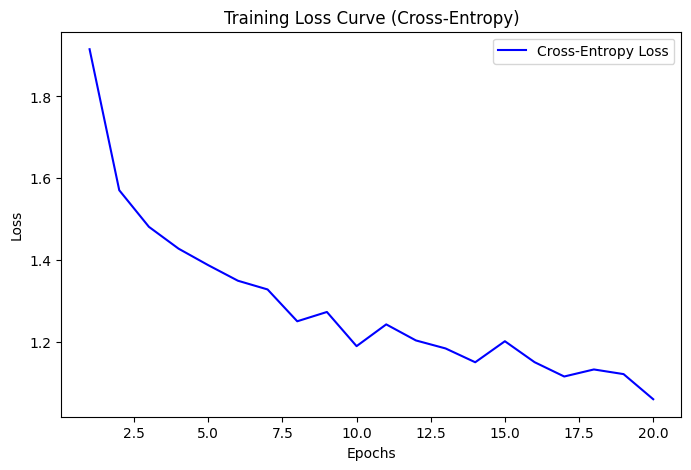

In [ ]:
history = model.fit(X_train_scaled, y_train_encoded,
                    epochs=20, batch_size=8, verbose=1)

plt.figure(figsize=(8,5))
plt.plot(range(1, len(history.history['loss']) + 1), history.history['loss'], label='Cross-Entropy Loss', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Curve (Cross-Entropy)')
plt.legend()
plt.show()

# **Evaluate Model Performance**

In [ ]:
# 🚀 Step 1: Get model predictions
y_pred_encoded = model.predict(X_test_scaled)  # Predict probabilities for each class

# 🚀 Step 2: Convert predictions to final ranking position
y_pred = y_pred_encoded.argmax(axis=1) + 1  # Convert one-hot encoded output to ranking position (1-based)

# 🚀 Step 3: Convert actual test labels to ranking position
y_test_actual = y_test_encoded + 1  # Convert actual one-hot encoded labels back to ranking

# 🚀 Step 4: Compute MAE (Mean Absolute Error)
test_mae = mean_absolute_error(y_test_actual, y_pred)

# 🚀 Step 5: Print MAE Score for Ranking Accuracy
print(f"\n✅ Neural Network Model Mean Absolute Error (MAE) on Test Data: {test_mae:.2f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step

✅ Neural Network Model Mean Absolute Error (MAE) on Test Data: 0.92
